국제캠퍼스


In [1]:
from selenium import webdriver
from bs4 import BeautifulSoup
from collections import defaultdict
import time
import datetime
import os
import json
from krwordrank.word import KRWordRank
from wordcloud import WordCloud
import pickle

In [2]:
'''
검색 키워드 input값 설정해주기
국제캠 검색 -> 서울캠 검색 (for문)
각자 txt 파일 저장하도록 + utf-8 인코딩으로
'''

'\n검색 키워드 input값 설정해주기\n국제캠 검색 -> 서울캠 검색 (for문)\n각자 txt 파일 저장하도록 + utf-8 인코딩으로\n'

In [4]:
search_keyword = input('검색어를 입력해주세요')
FIND_NUM = int(input('몇 페이지를 크롤링하실건가요?'))

검색어를 입력해주세요캠퍼스 이름
몇 페이지를 크롤링하실건가요?6


In [7]:
YOUR_ID = 'ehdrn463'                            # 에브리타임 아이디
YOUR_PASSWORD = 'fkdghk513'                      # 에브리타임 비밀번호
BOARD_URL = 'https://everytime.kr/370441/all/' + search_keyword + '/p/'   # 에브리타임 해당 학교 자유게시판 주소
def tree(): 
    return defaultdict(tree)


driver = webdriver.Chrome('./chromedriver.exe')
driver.implicitly_wait(10)
driver.get('https://everytime.kr/login')

# 접속b
driver.find_element_by_xpath('//*[@id="container"]/form/p[1]/input').send_keys(YOUR_ID)   # 아이디
driver.find_element_by_xpath('//*[@id="container"]/form/p[2]/input').send_keys(YOUR_PASSWORD)   # 비밀번호
driver.find_element_by_xpath('//*[@id="container"]/form/p[3]/input').click()                # 로그인 버튼
time.sleep(2)
# driver.find_element_by_xpath('//*[@id="container"]/div[4]/div[1]/div/h3/a').click()          # 자유게시판 클릭
driver.get(BOARD_URL)
print('login success')

# 자유게시판 링크 모으기
everytime_link = list() # 링크 리스트
fail_link = list() # 실패 리스트
page_number = 1
content_number = 0

# Result 폴더 설정
if not os.path.isdir("./Result_Gukje/"):
    os.mkdir("./Result_Gukje/")
    print('making directory')
    
if not os.path.isdir("./Result_Gukje/" + search_keyword):
    os.mkdir("./Result_Gukje/" + search_keyword)
    print("search_keyword 폴더 생성 완료")
    
# 'article'이라는 태그 찾기
# '리스트 중에 하나하나 게시글임
for i in range(FIND_NUM):
    time.sleep(7)    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    content = soup.findAll('article')
    
    # 게시글 하나마다 url 찾아서 링크에 더해주기
    for url in content:
        try:
            find_url = url.find('a', attrs={'class', 'article'}).get('href')
            everytime_link.append(find_url)
            print(find_url)
        except:
            print('페이지부족')
            pass
    time.sleep(2)
    driver.get(BOARD_URL + str(page_number)) # 자유게시판
    page_number = page_number + 1
print('한 페이지에서 게시글 하나하나 링크 획득')


#everytime_link.txt 만들어서 조인하는 링크 적어주기    
with open('./Link_Gukje/everytime_link.txt', 'w') as fileobject:
    for join_link in everytime_link:
        fileobject.write(join_link)
        fileobject.write('\n')
print('everytime_link.txt 만들어주기')


#everytime_link 정보 끄집어내기
for url in everytime_link:
        
    time_now = datetime.datetime.now()      #현재 시간 저장
    json_data = dict()
    comment_text = list()
    comment_time = list()
    json_data['comment_text'] = list()
    json_data['comment_time'] = list()
    
    #게시글 긁어오기
    try:
        driver.get('https://everytime.kr' + url)
        time.sleep(5)

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        # append 로 수정할것
        title = soup.find('h2', attrs={'class', 'large'}).get_text()
        text = soup.find('p', attrs={'class', 'large'}).get_text()
        text_time = soup.find('time', attrs={'class', 'large'}).get_text()
        
        
        # 코멘트 긁어오기
        try:
            comment = soup.findAll('article')

            for content in comment:
                comment_text.append(content.find('p').get_text())
                comment_time.append(content.find('time').get_text())
        except:
            pass                   #댓글없음
        
        
        json_data['title'] = title
        json_data['text'] = text
        json_data['tex_time'] = text_time
        json_data['now_time'] = str(time_now)
        
        json_data['comment_text'] = comment_text
        json_data['comment_time'] = comment_time
        
    except Exception as e:
        print(e)
        fail_link.append(url)
        continue

    with open('./Result_Gukje/' + search_keyword + '/' + 'text' + str(content_number) + '.txt', 'w') as fileobject:
        json.dump(json_data, fileobject)
        content_number = content_number + 1

        
        
# 실패 리스트 만들기        
with open('./Link_fail_Gukje/fail_url.txt', 'w') as fileobject:
    for join_link in fail_link:
        fileobject.write(join_link)
        fileobject.write('\n')
    print('실패리스트 만들기 성공')
            
driver.close()




login success
/370441/v/80099526
/370441/v/76553645
/370441/v/76452349
/370441/v/75716045
/370441/v/74602069
/370441/v/74460508
/370441/v/74453451
/370441/v/71300566
/370441/v/70953843
/370441/v/80099526
/370441/v/76553645
/370441/v/76452349
/370441/v/75716045
/370441/v/74602069
/370441/v/74460508
/370441/v/74453451
/370441/v/71300566
/370441/v/70953843
/370441/v/68437245
/370441/v/68347266
/370441/v/66907126
/370441/v/66742755
/370441/v/66640199
/370441/v/65636778
/370441/v/65006776
/370441/v/64156616
/370441/v/64155471
/370441/v/63904864
/370441/v/63901290
/370441/v/63891158
/370441/v/61499931
/370441/v/43840430
/370441/v/43593354
/370441/v/40153418
/370441/v/39482185
/370441/v/31216750
/370441/v/31022126
/370441/v/30430550
/370441/v/30380530
/370441/v/27832505
/370441/v/27794216
/370441/v/27690781
/370441/v/27227827
/370441/v/24544022
/370441/v/23934530
/370441/v/22777744
/370441/v/22286558
/370441/v/22279622
/370441/v/22277841
/370441/v/22276798
/370441/v/22275394
/370441/v/2207900

In [8]:
# https://wikidocs.net/39 참조

def search(dirname):        # 디렉토리 속 파일 경로 리스트 가져오기 ex : ./Result_Gukje/file.txt
    file_name_list = list()
    filenames = os.listdir(dirname)
    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        file_name_list.append(full_filename)
    return file_name_list

def file_read(file_name_list):  # json 으로 해당 경로 파일 가져오기
    data = list()
    for file_path in file_name_list:
        with open(file_path, 'r') as file_point:
            data.append(json.load(file_point))
    return data

In [9]:
file_list = search('./Result_Gukje/'+ search_keyword)
data = file_read(file_list)

#print(file_list)
#print(data[0].keys())
#print(data[4]['title'])
#print(data[0]['text'])

In [10]:
# https://lovit.github.io/nlp/2018/04/17/word_cloud/ 참조

wordrank_extractor = KRWordRank(
    min_count = 15, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 15, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

input_text = str()
text = list()
for content in data:
    text.append(content['text'])
    text.append(content['title'])
    
    for comment in content['comment_text']:
        text.append(comment)

input_text = ' '.join(text)

In [11]:
keywords = None
rank = ''
graph = None
keywords, rank, graph = wordrank_extractor.extract(text, beta, max_iter)

scan vocabs ... 
num vocabs = 1467
done = 10


In [12]:
with open('./Result_Gukje/' + search_keyword + '/' + 'summary_' + search_keyword + '.txt', 'wb') as f:
    for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:60]:
        print('%8s:\t%.4f' % (word, r))
        pickle.dump(keywords,f)

     경희대:	10.1696
      이름:	6.9912
     캠퍼스:	6.2716
      학교:	6.0803
      국제:	5.4362
      있는:	5.1662
     삭제된:	4.8337
      그냥:	4.5279
      다른:	4.4851
      서울:	4.1215
      국캠:	4.0984
      분교:	4.0472
      대학:	3.7117
      같은:	3.6412
      사람:	3.6203
     이원화:	3.5388
      인식:	3.0882
      아니:	3.0598
      설캠:	3.0202
      하는:	2.7363
      학생:	2.6712
      생각:	2.6505
      알고:	2.5872
      입결:	2.5605
      진짜:	2.4367
   있습니다.:	2.3181
     이렇게:	2.3141
      많은:	2.3084
     그리고:	2.3067
      무슨:	2.2314
      그런:	2.2282
      하면:	2.1698
      근데:	2.1504
      성대:	2.1105
      하고:	2.1058
      문과:	2.0685
     때문에:	2.0187
      본교:	1.9903
      ㅋㅋ:	1.9825
      대해:	1.9582
      제가:	1.9342
      학과:	1.9231
      댓글:	1.9229
      이런:	1.8409
      너무:	1.7904
      없는:	1.7248
      ㅎㅎ:	1.7203
      그럼:	1.7131
      우리:	1.7025
      것은:	1.6949
      또한:	1.6939
      지금:	1.6745
      공대:	1.6630
      전혀:	1.6600
      기타:	1.6311
      외대:	1.6123
     그렇게:	1.6107
      사실:	1.5936
      대한:	1.5

In [13]:
print(keywords)
print(type(keywords))


{'경희대': 10.169580799493989, '이름': 6.991153344102447, '캠퍼스': 6.2715524689182915, '학교': 6.080282994395563, '국제': 5.436189773960938, '있는': 5.1661564492067145, '삭제된': 4.833691182867754, '그냥': 4.527896787573062, '다른': 4.485069916767062, '서울': 4.121531750922606, '국캠': 4.098364019001093, '분교': 4.047248223564743, '대학': 3.711739465283181, '같은': 3.641193127785775, '사람': 3.6202897859090384, '이원화': 3.5388071149796523, '인식': 3.0881534087309386, '아니': 3.059775067582897, '설캠': 3.0201961732026303, '하는': 2.736299563870536, '학생': 2.6712473261425465, '생각': 2.650489739882972, '알고': 2.5872054359419416, '입결': 2.5605294065879898, '진짜': 2.436720670567084, '있습니다.': 2.318087963358871, '이렇게': 2.3141074231637795, '많은': 2.3083847195928486, '그리고': 2.3067199213061196, '무슨': 2.2314184386264926, '그런': 2.228150575986305, '하면': 2.169807185646491, '근데': 2.1504461318690398, '성대': 2.1104812593062396, '하고': 2.105772889148774, '문과': 2.068475811449612, '때문에': 2.018705981996745, '본교': 1.9902545536150331, 'ㅋㅋ': 1.98245980377622

In [14]:

with open('./Result_Gukje/' + search_keyword + '/' + search_keyword + '.txt', 'wb') as f:
    pickle.dump(keywords,f)

with open('./Result_Gukje/' + search_keyword + '/' + search_keyword + '.txt', 'rb') as f:
    data=pickle.load(f)
print(data)
# f = open('./Result_Gukje/' + search_keyword + '/' + search_keyword '.txt', 'w')
# f.write(keywords)
# f.close()

{'경희대': 10.169580799493989, '이름': 6.991153344102447, '캠퍼스': 6.2715524689182915, '학교': 6.080282994395563, '국제': 5.436189773960938, '있는': 5.1661564492067145, '삭제된': 4.833691182867754, '그냥': 4.527896787573062, '다른': 4.485069916767062, '서울': 4.121531750922606, '국캠': 4.098364019001093, '분교': 4.047248223564743, '대학': 3.711739465283181, '같은': 3.641193127785775, '사람': 3.6202897859090384, '이원화': 3.5388071149796523, '인식': 3.0881534087309386, '아니': 3.059775067582897, '설캠': 3.0201961732026303, '하는': 2.736299563870536, '학생': 2.6712473261425465, '생각': 2.650489739882972, '알고': 2.5872054359419416, '입결': 2.5605294065879898, '진짜': 2.436720670567084, '있습니다.': 2.318087963358871, '이렇게': 2.3141074231637795, '많은': 2.3083847195928486, '그리고': 2.3067199213061196, '무슨': 2.2314184386264926, '그런': 2.228150575986305, '하면': 2.169807185646491, '근데': 2.1504461318690398, '성대': 2.1104812593062396, '하고': 2.105772889148774, '문과': 2.068475811449612, '때문에': 2.018705981996745, '본교': 1.9902545536150331, 'ㅋㅋ': 1.98245980377622

In [15]:
wordcloud = WordCloud(
    font_path = './NanumGothic.ttf',
    width = 1200,
    height = 1200,
    background_color="white"
)

# keywords.pop('삭제된')     # 이상한 값들 제거
# keywords.pop('댓글입니다.')
# keywords.pop('처리중입니다')

#wordcloud = wordcloud.generate_from_text(text)
wordcloud = wordcloud.generate_from_frequencies(keywords)

In [16]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())

In [17]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (, 800, 3)

<class 'numpy.ndarray'>
(1200, 1200, 3)


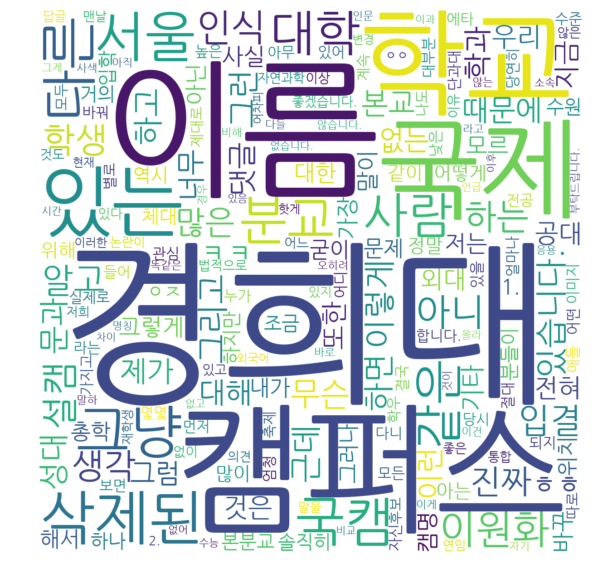

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('./Result_Gukje/' + search_keyword + '/' + search_keyword + '.png')  # 이미지 저장

서울캠퍼스

In [20]:
YOUR_ID = 'ehdrn463'                            # 에브리타임 아이디
YOUR_PASSWORD = 'fkdghk513'                      # 에브리타임 비밀번호
BOARD_URL = 'https://everytime.kr/370442/all/' + search_keyword + '/p/'   # 에브리타임 해당 학교 자유게시판 주소
def tree(): 
    return defaultdict(tree)


driver = webdriver.Chrome('./chromedriver.exe')
driver.implicitly_wait(10)
driver.get('https://everytime.kr/login')

# 접속b
driver.find_element_by_xpath('//*[@id="container"]/form/p[1]/input').send_keys(YOUR_ID)   # 아이디
driver.find_element_by_xpath('//*[@id="container"]/form/p[2]/input').send_keys(YOUR_PASSWORD)   # 비밀번호
driver.find_element_by_xpath('//*[@id="container"]/form/p[3]/input').click()                # 로그인 버튼
time.sleep(2)
# driver.find_element_by_xpath('//*[@id="container"]/div[4]/div[1]/div/h3/a').click()          # 자유게시판 클릭
driver.get(BOARD_URL)
print('login success')

# 자유게시판 링크 모으기
everytime_link = list() # 링크 리스트
fail_link = list() # 실패 리스트
page_number = 1
content_number = 0

# Result 폴더 설정
if not os.path.isdir("./Result_Seoul/"):
    os.mkdir("./Result_Seoul/")
    print('making directory')
    
if not os.path.isdir("./Result_Seoul/" + search_keyword):
    os.mkdir("./Result_Seoul/" + search_keyword)
    print("search_keyword 폴더 생성 완료")
    
    
# 'article'이라는 태그 찾기
# '리스트 중에 하나하나 게시글임
for i in range(FIND_NUM):
    time.sleep(7)    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    content = soup.findAll('article')
    
    # 게시글 하나마다 url 찾아서 링크에 더해주기
    for url in content:
        try:
            find_url = url.find('a', attrs={'class', 'article'}).get('href')
            everytime_link.append(find_url)
            print(find_url)
        except:
            print('페이지부족')
            pass
    time.sleep(2)
    driver.get(BOARD_URL + str(page_number)) # 자유게시판
    page_number = page_number + 1
print('한 페이지에서 게시글 하나하나 링크 획득')


#everytime_link.txt 만들어서 조인하는 링크 적어주기    
with open('./Link_Seoul/everytime_link.txt', 'w') as fileobject:
    for join_link in everytime_link:
        fileobject.write(join_link)
        fileobject.write('\n')
print('everytime_link.txt 만들어주기')


#everytime_link 정보 끄집어내기
for url in everytime_link:
        
    time_now = datetime.datetime.now()      #현재 시간 저장
    json_data = dict()
    comment_text = list()
    comment_time = list()
    json_data['comment_text'] = list()
    json_data['comment_time'] = list()
    
    #게시글 긁어오기
    try:
        driver.get('https://everytime.kr' + url)
        time.sleep(5)

        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        # append 로 수정할것
        title = soup.find('h2', attrs={'class', 'large'}).get_text()
        text = soup.find('p', attrs={'class', 'large'}).get_text()
        text_time = soup.find('time', attrs={'class', 'large'}).get_text()
        
        
        # 코멘트 긁어오기
        try:
            comment = soup.findAll('article')

            for content in comment:
                comment_text.append(content.find('p').get_text())
                comment_time.append(content.find('time').get_text())
        except:
            pass                   #댓글없음
        
        
        json_data['title'] = title
        json_data['text'] = text
        json_data['tex_time'] = text_time
        json_data['now_time'] = str(time_now)
        
        json_data['comment_text'] = comment_text
        json_data['comment_time'] = comment_time
        
    except Exception as e:
        print(e)
        fail_link.append(url)
        continue

    with open('./Result_Seoul/' + search_keyword + '/' + 'text' + str(content_number) + '.txt', 'w') as fileobject:
        json.dump(json_data, fileobject)
        content_number = content_number + 1

        
        
# 실패 리스트 만들기        
with open('./Link_fail_Seoul/fail_url.txt', 'w') as fileobject:
    for join_link in fail_link:
        fileobject.write(join_link)
        fileobject.write('\n')
    print('실패리스트 만들기 성공')
            
driver.close()




login success
/370442/v/79533871
/370442/v/75013213
/370442/v/74659001
/370442/v/74455031
/370442/v/74449797
/370442/v/72664600
/370442/v/68696981
/370442/v/68375745
/370442/v/68289571
/370442/v/64155289
/370442/v/79533871
/370442/v/75013213
/370442/v/74659001
/370442/v/74455031
/370442/v/74449797
/370442/v/72664600
/370442/v/68696981
/370442/v/68375745
/370442/v/68289571
/370442/v/64155289
/370442/v/58276137
/370442/v/54915433
/370442/v/50325888
/370442/v/50265675
/370442/v/49687747
/370442/v/40634949
/370442/v/40625959
/370442/v/34379555
/370442/v/33846326
/370442/v/33062969
/370442/v/30431489
/370442/v/28634710
/370442/v/28632332
/370442/v/28632235
/370442/v/28632215
/370442/v/28632190
/370442/v/28632172
/370442/v/22726780
/370442/v/22726529
/370442/v/22726404
/370442/v/22725698
/370442/v/22723419
/370442/v/22713826
/370442/v/22712081
/370442/v/22710646
/370442/v/22704494
/370442/v/22701754
/370442/v/22480920
/370442/v/22385226
/370442/v/22276623
/370442/v/21437266
/370442/v/2131774

In [21]:
# https://wikidocs.net/39 참조

def search(dirname):        # 디렉토리 속 파일 경로 리스트 가져오기 ex : ./Result_Seoul/file.txt
    file_name_list = list()
    filenames = os.listdir(dirname)
    for filename in filenames:
        full_filename = os.path.join(dirname, filename)
        file_name_list.append(full_filename)
    return file_name_list

def file_read(file_name_list):  # json 으로 해당 경로 파일 가져오기
    data = list()
    for file_path in file_name_list:
        with open(file_path, 'r') as file_point:
            data.append(json.load(file_point))
    return data

In [22]:
file_list = search('./Result_Seoul/'+ search_keyword)
data = file_read(file_list)

#print(file_list)
#print(data[0].keys())
print(data[4]['title'])
print(data[0]['text'])

사칭을 하든가 말든가 상관없는데
서울캠퍼스 중앙도서관 1층 분수대 아이들 동상이름을 지어주세요!(시험기간에는 이런거 하면서 노는 것...!)


In [23]:
# https://lovit.github.io/nlp/2018/04/17/word_cloud/ 참조

wordrank_extractor = KRWordRank(
    min_count = 15, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 15, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

input_text = str()
text = list()
for content in data:
    text.append(content['text'])
    text.append(content['title'])
    
    for comment in content['comment_text']:
        text.append(comment)

input_text = ' '.join(text)

In [24]:
keywords = None
rank = ''
graph = None
keywords, rank, graph = wordrank_extractor.extract(text, beta, max_iter)

scan vocabs ... 
num vocabs = 1985
done = 10


In [25]:
with open('./Result_Seoul/' + search_keyword + '/' + 'summary_' + search_keyword + '.txt', 'wb') as f:
    for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:60]:
        print('%8s:\t%.4f' % (word, r))
        pickle.dump(keywords,f)

      있는:	6.9824
      우리:	4.8818
      나는:	4.5718
     캠퍼스:	4.5413
      것이:	4.3193
     서울캠:	3.9758
     그리고:	3.8863
      아니:	3.7529
      다른:	3.7221
      하는:	3.7147
      이름:	3.4605
     피고인:	3.3843
      대학:	3.2960
      위해:	3.1436
      학생:	3.0489
     경희대:	3.0378
      것은:	3.0358
      같은:	2.9333
      남자:	2.8735
      학교:	2.8288
      함께:	2.7911
     삭제된:	2.7147
      내가:	2.6993
      지금:	2.6970
      그냥:	2.6716
      나를:	2.6123
      지원:	2.4797
      사건:	2.4718
      것을:	2.4698
      모든:	2.4404
      중국:	2.4386
      생각:	2.4297
      없는:	2.3348
      일이:	2.3169
      대한:	2.2011
     했다.:	2.1935
      경우:	2.1902
      사람:	2.1891
      면접:	2.1871
     열면>:	2.1265
      하지:	2.0108
      너무:	1.9925
      3월:	1.9777
      지난:	1.9756
      저는:	1.9599
      여자:	1.9416
      산책:	1.9218
      가장:	1.9079
      아이:	1.8999
      제가:	1.8719
      한국:	1.8713
      국캠:	1.8665
     그렇게:	1.8628
      역시:	1.8574
     있다.:	1.8220
      위한:	1.7735
      많은:	1.7098
    <옷장을:	1.7067
      통해:	1.67

In [26]:
print(keywords)
print(type(keywords))

{'있는': 6.982414333814051, '우리': 4.881765412462161, '나는': 4.571792987201646, '캠퍼스': 4.541302828416375, '것이': 4.319312749753245, '서울캠': 3.97576274750995, '그리고': 3.886250440935954, '아니': 3.7528818506528983, '다른': 3.7221352683759474, '하는': 3.714722375459301, '이름': 3.4605377829580104, '피고인': 3.3842908712974293, '대학': 3.296008558616152, '위해': 3.1436006349145362, '학생': 3.048913500883807, '경희대': 3.0377874914599716, '것은': 3.035754444207717, '같은': 2.9333152308354973, '남자': 2.87354141949802, '학교': 2.8287988816162852, '함께': 2.791067407917284, '삭제된': 2.714699972956621, '내가': 2.699302396328661, '지금': 2.6970291427917483, '그냥': 2.6715619280486926, '나를': 2.612344127979771, '지원': 2.4797419480206, '사건': 2.4717531986712897, '것을': 2.469833638086456, '모든': 2.440353674467378, '중국': 2.4386072601014686, '생각': 2.42972952453628, '없는': 2.3347624494626347, '일이': 2.316886362507126, '대한': 2.201056859543998, '했다.': 2.1935452798998787, '경우': 2.190196045298739, '사람': 2.1890828981462183, '면접': 2.1871281400443814, '열면>':

In [27]:
with open('./Result_Seoul/' + search_keyword + '/' + search_keyword + '.txt', 'wb') as f:
    pickle.dump(keywords,f)

with open('./Result_Seoul/' + search_keyword + '/' + search_keyword + '.txt', 'rb') as f:
    data=pickle.load(f)
print(data)
# f = open('./Result_Gukje/' + search_keyword + '/' + search_keyword '.txt', 'w')
# f.write(keywords)
# f.close()

{'있는': 6.982414333814051, '우리': 4.881765412462161, '나는': 4.571792987201646, '캠퍼스': 4.541302828416375, '것이': 4.319312749753245, '서울캠': 3.97576274750995, '그리고': 3.886250440935954, '아니': 3.7528818506528983, '다른': 3.7221352683759474, '하는': 3.714722375459301, '이름': 3.4605377829580104, '피고인': 3.3842908712974293, '대학': 3.296008558616152, '위해': 3.1436006349145362, '학생': 3.048913500883807, '경희대': 3.0377874914599716, '것은': 3.035754444207717, '같은': 2.9333152308354973, '남자': 2.87354141949802, '학교': 2.8287988816162852, '함께': 2.791067407917284, '삭제된': 2.714699972956621, '내가': 2.699302396328661, '지금': 2.6970291427917483, '그냥': 2.6715619280486926, '나를': 2.612344127979771, '지원': 2.4797419480206, '사건': 2.4717531986712897, '것을': 2.469833638086456, '모든': 2.440353674467378, '중국': 2.4386072601014686, '생각': 2.42972952453628, '없는': 2.3347624494626347, '일이': 2.316886362507126, '대한': 2.201056859543998, '했다.': 2.1935452798998787, '경우': 2.190196045298739, '사람': 2.1890828981462183, '면접': 2.1871281400443814, '열면>':

In [28]:
wordcloud = WordCloud(
    font_path = './NanumGothic.ttf',
    width = 1200,
    height = 1200,
    background_color="white"
)

# keywords.pop('삭제된')     # 이상한 값들 제거
# keywords.pop('댓글입니다.')
# keywords.pop('처리중입니다')

#wordcloud = wordcloud.generate_from_text(text)
wordcloud = wordcloud.generate_from_frequencies(keywords)

In [29]:
def __array__(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return self.to_array()

def to_array(self):
    """Convert to numpy array.
    Returns
    -------
    image : nd-array size (width, height, 3)
        Word cloud image as numpy matrix.
    """
    return np.array(self.to_image())

In [30]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (, 800, 3)

<class 'numpy.ndarray'>
(1200, 1200, 3)


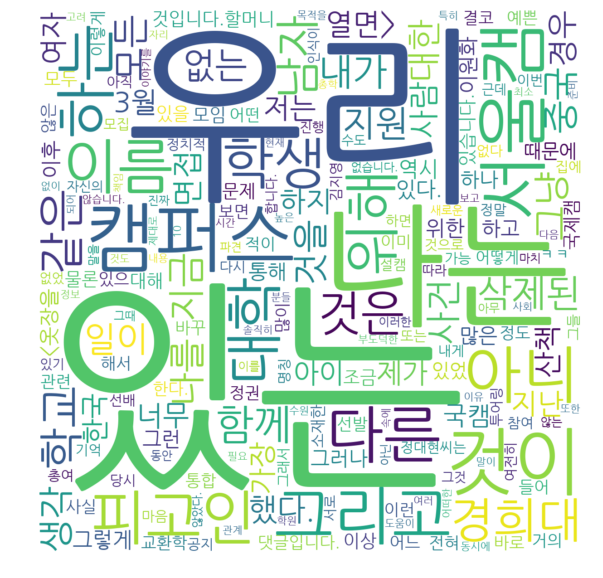

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis("off")
plt.show()
fig.savefig('./Result_Seoul/' + search_keyword + '/' + search_keyword + '.png')  # 이미지 저장